### Code Implementation

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image, ImageEnhance


### Loading Dataset

In [2]:
# Opening file for reading in binary mode
#- data3.pickle - Shuffling, /255.0 + Mean + STD Normalization
with open('D:\Project\Traffic Sign Detection\DATABASE/data0.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

train_imgs = data['x_train']
test_imgs = data['x_test']
valid_imgs = data['x_validation']
train_labels = data['y_train']
test_labels = data['y_test']
valid_labels = data['y_validation']

In [3]:
with open('D:\Project\Traffic Sign Detection\DATABASE/data4.pickle', 'rb') as f:
    gray_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
gray_data['x_train'] = gray_data['x_train'].transpose(0, 2, 3, 1)
gray_data['x_validation'] = gray_data['x_validation'].transpose(0, 2, 3, 1)
gray_data['x_test'] = gray_data['x_test'].transpose(0, 2, 3, 1)

gray_train_imgs = gray_data['x_train']
gray_test_imgs = gray_data['x_test']
gray_train_labels = gray_data['y_train']
gray_test_labels = gray_data['y_test']
gray_valid_imgs = gray_data['x_validation']
gray_valid_labels = gray_data['y_validation']

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    plt.imshow(image1)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

In [3]:
def canny(x):
    for i in range(0 , x.shape[0]):
        # enh = ImageEnhance.Brightness(Image.fromarray(np.uint8(x[i]* 255)))
        # enh_img = enh.enhance(2)
        x[i,:,:,0] = cv2.Canny(x[i], 100, 150)

        
    return x[:,:,:,0]
        

In [4]:
indx = np.array(np.where(train_labels <= 10)) #cycle
indx = np.concatenate((indx ,np.where(train_labels >= 32)), axis = 1) #cycle
indx = np.concatenate((indx ,np.where(train_labels == 15)), axis = 1) #cycle
indx = np.concatenate((indx ,np.where(train_labels == 16)), axis = 1) #cycle
indx = np.concatenate((indx ,np.where(train_labels == 17)), axis = 1) #cycle

indx1 = np.array(np.where(test_labels <= 10)) #cycle
indx1 = np.concatenate((indx1 ,np.where(test_labels >= 32)), axis = 1) #cycle
indx1 = np.concatenate((indx1 ,np.where(test_labels == 15)), axis = 1) #cycle
indx1 = np.concatenate((indx1 ,np.where(test_labels == 16)), axis = 1) #cycle
indx1 = np.concatenate((indx1 ,np.where(test_labels == 17)), axis = 1) #cycle

indx2 = np.array(np.where(valid_labels <= 10)) #cycle
indx2 = np.concatenate((indx2 ,np.where(valid_labels >= 32)), axis = 1) #cycle
indx2 = np.concatenate((indx2 ,np.where(valid_labels == 15)), axis = 1) #cycle
indx2 = np.concatenate((indx2 ,np.where(valid_labels == 16)), axis = 1) #cycle
indx2 = np.concatenate((indx2 ,np.where(valid_labels == 17)), axis = 1) #cycle

cycle_train_imgs = train_imgs[indx]
cycle_test_imgs = test_imgs[indx1]
cycle_valid_imgs = valid_imgs[indx2]
cycle_train_labels = train_labels[indx]
cycle_test_labels = test_labels[indx1]
cycle_valid_labels = valid_labels[indx2]


(1, 50575, 32, 32, 3)


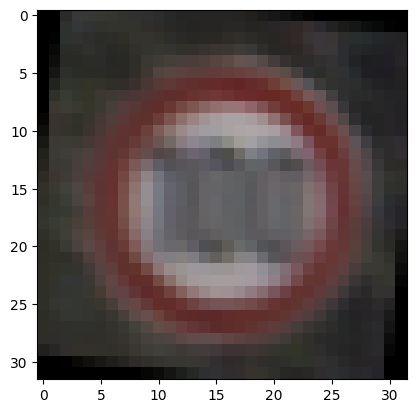

In [5]:
print(cycle_train_imgs.shape)
plt.imshow(cycle_train_imgs[0][60])

In [5]:
edges_train = canny(np.uint8(train_imgs[indx][0]))
edges_test =  canny(np.uint8(test_imgs[indx1][0]))
edges_valid = canny(np.uint8(valid_imgs[indx2][0]))



In [20]:
edges_train.shape

(50575, 32, 32)

In [6]:
cy_Dict = {0:0 ,1:1 ,2:2, 3:3 , 4:4 , 5:5 , 6:6 , 7:7 , 8:8 , 9:9 ,10:10 ,15:11 , 16:12 , 17:13 , 32:14 , 33:15 , 34:16 , 35:17 , 36:18 , 37:19 , 38:20 , 39:21 , 40:22 , 41:23 , 42:24 }
cycle_train_labels = np.vectorize(cy_Dict.get)(cycle_train_labels)
cycle_test_labels = np.vectorize(cy_Dict.get)(cycle_test_labels)
cycle_valid_labels = np.vectorize(cy_Dict.get)(cycle_valid_labels)
cy_num_class = 25

### Image Data Preprocessing

In [7]:
# Peforming reshaping operation
# x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)

x_train = np.zeros((cycle_train_imgs[0].shape[0], 32,32,4))
x_test = np.zeros((cycle_test_imgs[0].shape[0], 32,32,4))
x_valid = np.zeros((cycle_valid_imgs[0].shape[0], 32,32,4))

x_train[:,:,:,0:3] = cycle_train_imgs[0]
x_test[:,:,:,0:3] = cycle_test_imgs[0]
x_valid[:,:,:,0:3] = cycle_valid_imgs[0]

x_train[:,:,:,3] = edges_train
x_test[:,:,:,3] = edges_test
x_valid[:,:,:,3] = edges_valid

# # Normalization
x_train = x_train / 255
x_test = x_test / 255
x_valid = x_valid / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(cycle_train_labels[0], 25)
y_test = keras.utils.to_categorical(cycle_test_labels[0], 25)
y_valid = keras.utils.to_categorical(cycle_valid_labels[0], 25)

In [28]:
b.max()

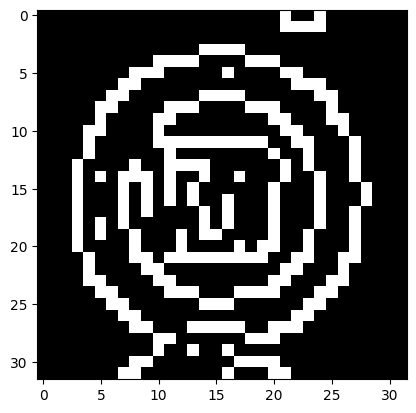

In [16]:
i = 6571
i =6
a = x_train[i][:,:,3] 
c = x_train[i][:,:,0:3]
b = edges_train[i]
plt.imshow(a * 255, cmap= 'gray')


In [8]:
a, x_train, b, y_train = train_test_split(x_train, y_train, test_size=0.36, random_state=42)

### LeNet Model Architecture

In [9]:
keras.backend.clear_session()

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras import regularizers

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,
                # kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                # bias_regularizer=regularizers.L2(1e-4),
                # activity_regularizer=regularizers.L2(1e-5),
                activation='relu'))
# model.add(Dropout(rate=0.5))
model.add(Dense(25,
                # kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                # bias_regularizer=regularizers.L2(1e-4),
                # activity_regularizer=regularizers.L2(1e-5),
                activation='softmax'))

In [11]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, batch_size=128, epochs=70, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/70
143/143 [==============================] - 9s 30ms/step - loss: 1.4496 - accuracy: 0.5728 - val_loss: 0.7291 - val_accuracy: 0.7773
Epoch 2/70
143/143 [==============================] - 4s 25ms/step - loss: 0.3820 - accuracy: 0.8938 - val_loss: 0.4084 - val_accuracy: 0.8699
Epoch 3/70
143/143 [==============================] - 4s 25ms/step - loss: 0.1644 - accuracy: 0.9603 - val_loss: 0.3016 - val_accuracy: 0.9025
Epoch 4/70
143/143 [==============================] - 4s 25ms/step - loss: 0.0941 - accuracy: 0.9781 - val_loss: 0.2563 - val_accuracy: 0.9128
Epoch 5/70
143/143 [==============================] - 4s 25ms/step - loss: 0.0663 - accuracy: 0.9843 - val_loss: 0.2963 - val_accuracy: 0.9071
Epoch 6/70
143/143 [==============================] - 3s 24ms/step - loss: 0.0441 - accuracy: 0.9883 - val_loss: 0.1933 - val_accuracy: 0.9369
Epoch 7/70
143/143 [==============================] - 4s 25ms/step - loss: 0.0262 - accuracy: 0.9940 - val_loss: 0.2611 - val_accuracy: 0.9333

In [13]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

255/255 [==============================] - 2s 7ms/step - loss: 0.4818 - accuracy: 0.9592
Test Loss: 0.4818478524684906
Test accuracy: 0.9591912031173706


In [14]:
from sklearn.metrics import classification_report
pred = model.predict(x_test).argmax(axis = 1)
cr = classification_report(y_test.argmax(axis = 1) , pred , output_dict = True) 
print(cr)

255/255 [==============================] - 1s 4ms/step
{'0': {'precision': 0.8450704225352113, 'recall': 1.0, 'f1-score': 0.916030534351145, 'support': 60}, '1': {'precision': 0.9494535519125683, 'recall': 0.9652777777777778, 'f1-score': 0.9573002754820936, 'support': 720}, '2': {'precision': 0.9478609625668449, 'recall': 0.9453333333333334, 'f1-score': 0.9465954606141522, 'support': 750}, '3': {'precision': 0.9281045751633987, 'recall': 0.9466666666666667, 'f1-score': 0.9372937293729374, 'support': 450}, '4': {'precision': 0.9825119236883942, 'recall': 0.9363636363636364, 'f1-score': 0.9588828549262994, 'support': 660}, '5': {'precision': 0.9057187017001546, 'recall': 0.9301587301587302, 'f1-score': 0.9177760375880972, 'support': 630}, '6': {'precision': 0.9772727272727273, 'recall': 0.86, 'f1-score': 0.9148936170212766, 'support': 150}, '7': {'precision': 0.9622641509433962, 'recall': 0.9066666666666666, 'f1-score': 0.9336384439359268, 'support': 450}, '8': {'precision': 0.9119496855

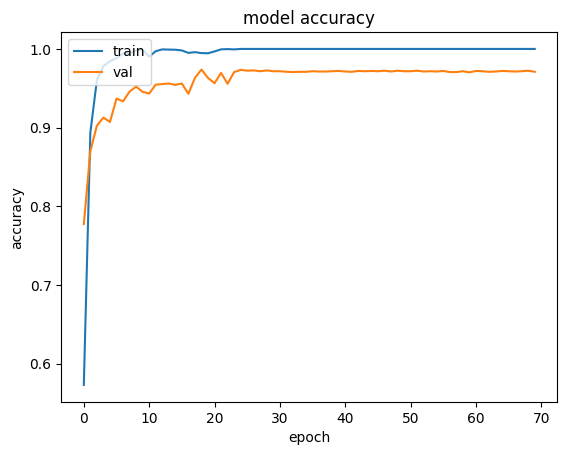

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

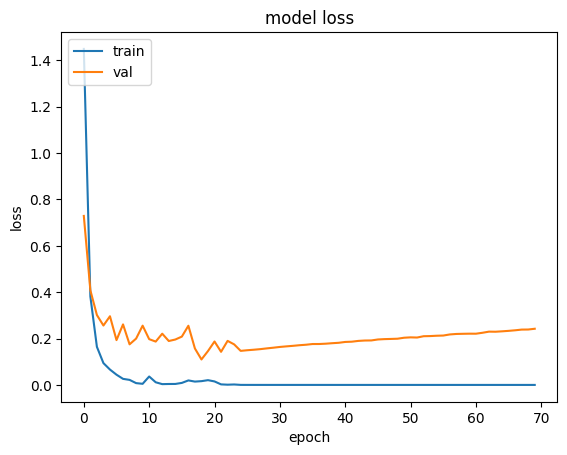

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(28,20))
heatmap(cm,annot=True, fmt='.2g')

NameError: name 'confusion_matrix' is not defined

In [40]:
model.count_params()

474937

In [17]:
model_save_dir = "D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\circle_classifier_data0_acc98_edge_36per.h5"  

model.save(model_save_dir)


In [97]:
x_test[1].shape

(32, 32, 3)

## Hope you like it!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


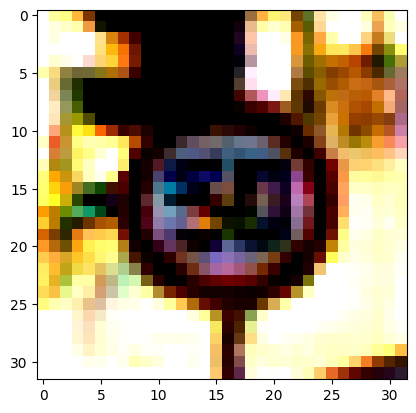

1/1 [==============================] - 0s 336ms/step
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [17]:
from matplotlib import pyplot as plt
image = x_train[65:66,:,:]#.transpose(2 , 0 ,1)
plt.imshow(image[0].reshape((32,32,3)))
plt.show()
#y = model.predict_classes(image)
y = (model.predict(image) > 0.5).astype("int32")
print(y[0])
print(y_train[65:66])

In [ ]:
image[0].reshape((32,32)).shape

In [ ]:
import numpy
x = numpy.where(gray_train_labels == 2)